In [57]:
import sys
from collections import OrderedDict
import matplotlib.pyplot as plt
import parselmouth
import re
import pandas as pd

import librosa
import numpy as np

In [58]:
def run_script_with_pluseq(init_script):
    script = init_script

    to_include = True
    while to_include:
        match = re.search(r'^include ((?:\w|\.)+)', script, re.MULTILINE)
        if match:
            with open(match.group(1)) as f:
                script = script[:match.start()] + f.read() + '\n' + script[match.end():]
        else:
            to_include = False

    script = re.sub(r'((?:\w|\.)+\$)\s*\+=', r'\1 = \1 +', script)
    parselmouth.praat.run(script)

In [59]:
# name = "hindi_20s"
# name = "telugu_15s"
name = "telugu_para9"

In [60]:
# #MAIN

# if len(sys.argv) < 2:
# print("Error! Give argument: input_file.wav")#wavfile_data.txt wavfile_profile_data.txt")
# sys.exit(0)

# file_in = sys.argv[1]

wav_file =name+".wav"
file_in = './wav_files/'+wav_file
init_script = 'include prosomain.praat\n'
init_script += 'call prosogram file=' + file_in + ' save=yes draw=no\n'
init_script += 'exit'

run_script_with_pluseq(init_script) #Generate data and profile_data files using prosogram in praat

Batch mode...
 
Batch command prosogram
Processing input file <telugu_para9>...
Selected optimal segmentation method: asyll
Analysis time range: 0 - 26.708 s (0 min, 26.708 s)
Reading parameter files...
Calculating parameters...
Calculating pitch in autorange mode, Pass 1...
.	Time step=0.01, F0 range=65-800 Hz (72.3-115.7 ST), Voicing threshold=0.45
.	Pitch percentiles 5%=80 25%=90 50%=100 75%=118 95%=164 (Hz)
.	Selected F0 detection range for pass 2: 50-282 Hz, 67.7-97.7 ST
Calculating pitch for fixed frequency range...
.	Time step=0.005, F0 range=50-282 Hz (67.7-97.7 ST), Voicing threshold=0.45
.	Pitch percentiles 50%=100 5%=81 95%=164 (Hz)
Writing Pitch object to ./wav_files/telugu_para9.Pitch
Calculating intensity of BP filtered signal (fc_low=300, fc_high=3500) ...
Segmentation into syllabic nuclei. Method=asyll, Time range=0-26.708
Calculating actual segmentation. Method=asyll...
Detecting hesitations (method=automatic)...
Calculating stylization... (asyll, G(adapt)=0.16-0.32/T^

In [61]:
#Now using the datafiles for patterns

datafile_in = file_in[:-4] + "_data.txt" #removing ".wav"
profile_in = file_in[:-4] + "_profile_data.txt"

f = open(datafile_in)

text = f.read()
lines = text.split('\n')

new_lines = []

for line in lines:
    split_line = line.split('\t')
    new_lines.append(split_line)
#     print(split_line)
#     print("--")
    
row_label_index = new_lines[0].index("rowLabel")
nucl_t1_index = new_lines[0].index("nucl_t1")
nucl_t2_index = new_lines[0].index("nucl_t2")
f0_start_index = new_lines[0].index("f0_start")
f0_end_index = new_lines[0].index("f0_end")

f.close()
data_dict = {}
for i, header in enumerate(new_lines[0]):
#     print(len(new_lines[1:][-2]))
    data_dict[header] = [row[i] for row in new_lines[1:-1]]

data_wav = pd.DataFrame(data_dict)
print(data_wav.columns)

max_time =data_wav["nucl_t1"][len(data_wav)-1]
# print(max_time)
# print(max_time.find('.'))
i = max_time.find('.')+7
# print(i)
data_wav["nucl_t1"]=data_wav["nucl_t1"].str[:i]
# data_wav["nucl_t1"]=pd.to_numeric(data_wav["nucl_t1"])
data_wav["nucl_t2"]=data_wav["nucl_t2"].str[:i]
# data_wav["nucl_t2"]=pd.to_numeric(data_wav["nucl_t2"])
data_wav = data_wav.apply(pd.to_numeric)

Index(['rowLabel', 'nucl_t1', 'nucl_t2', 'f0_min', 'f0_max', 'f0_median',
       'f0_mean', 'f0_meanST', 'f0_start', 'f0_end', 'lopitch', 'hipitch',
       'hipitchST', 'dynamic', 'intrasyllab', 'intersyllab', 'up', 'down',
       'trajectory', 'f0_discont', 'prnp_start', 'prnp_end', 'prnp_intra',
       'nucl_dur', 'syll_dur', 'vowel_dur', 'rhyme_dur', 'gap_left',
       'loudness', 'int_peak', 'hesitation', 'speaker_id', 'before_pause',
       'after_pause', 'pause_dur', 'iso_dur'],
      dtype='object')


In [62]:
li=['rowLabel', 'nucl_t1', 'nucl_t2', 'f0_min', 'f0_max', 'f0_median','f0_mean', 'f0_meanST', 'f0_start', 'f0_end']
data_wav[li]

,rowLabel,nucl_t1,nucl_t2,f0_min,f0_max,f0_median,f0_mean,f0_meanST,f0_start,f0_end
0,0.136,0.136275,0.216276,101,110,109,108,81.19,109,109
1,0.291,0.291276,0.371275,85,94,88,89,77.73,88,88
2,0.476,0.476276,0.501275,98,99,99,99,79.60,99,99
3,0.526,0.526276,0.566276,91,99,96,96,79.05,96,96
4,0.646,0.646276,0.691276,92,97,97,95,78.98,97,97
...,...,...,...,...,...,...,...,...,...,...
122,24.596,24.596275,24.636275,85,88,88,88,77.53,88,88
123,24.661,24.661275,24.731275,80,89,85,85,77.03,85,85
124,24.866,24.866275,24.896275,74,78,76,76,75.18,76,76
125,24.926,24.926275,24.956275,81,99,90,88,77.69,90,90


In [63]:
fp = open(profile_in)

text = fp.read()

lines = text.split('\n')

new_profile_lines = []

for line in lines:
    split_line = line.split('\t')
    new_profile_lines.append(split_line)
#     print(split_line)
#     print("--")

speech_rate = new_profile_lines[1][new_profile_lines[0].index("SpeechRate")]
speech_time = new_profile_lines[1][new_profile_lines[0].index("SpeechTime")]
f0_mean = float(new_profile_lines[1][new_profile_lines[0].index("F0MeanHz")])
pitch_top = float(new_profile_lines[1][new_profile_lines[0].index("PitchTopHz")])
pitch_bottom = float(new_profile_lines[1][new_profile_lines[0].index("PitchBottomHz")])

fp.close()

temp = "SpeechRate, SpeechTime, F0MeanHz, PitchBottomHz, PitchTopHz"
li = temp.split(", ")

data_dict = {}
for i, header in enumerate(new_profile_lines[0]):
#     print(len(new_lines[1:][-2]))
    data_dict[header] = [row[i] for row in new_profile_lines[1:-1]]

profile_wav = pd.DataFrame(data_dict)
profile_wav[li] = profile_wav[li].apply(pd.to_numeric)
profile_wav[li]

,SpeechRate,SpeechTime,F0MeanHz,PitchBottomHz,PitchTopHz
0,7.577,25.096,107,74.6,175.3


In [64]:
y,fs = librosa.load('./wav_files/'+wav_file)
print(len(y)/fs)

26.707573696145126


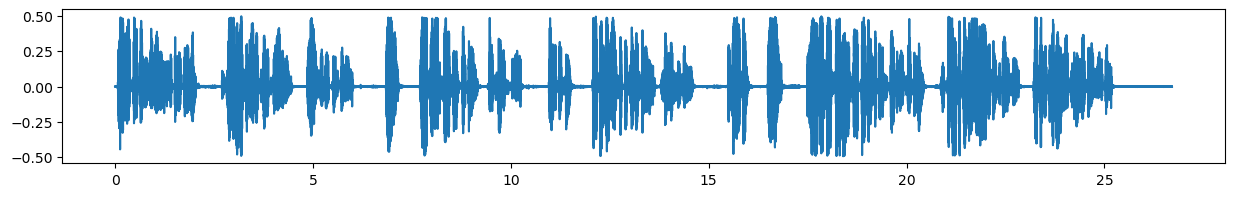

In [65]:
t = np.linspace(0,len(y)/fs,len(y),endpoint=False)
plt.figure(figsize=(15,2))
plt.plot(t,y);
plt.savefig(("./plots/"+name+"_waveform.png"), dpi=300,bbox_inches='tight')

In [66]:
tmin = np.abs(t[0]-t[1])
tmin
nucl_t1_sample = []
for i in range(len(data_wav)):
    temp = np.where(np.abs(t - data_wav['nucl_t1'][i]) < tmin*0.5)
    nucl_t1_sample.append(temp[0][0])
nucl_t2_sample = []
for i in range(len(data_wav)):
    temp = np.where(np.abs(t - data_wav['nucl_t2'][i]) < tmin*0.5)
    nucl_t2_sample.append(temp[0][0])
#     print(temp[0][0])
    # print(data_wav['nucl_t1'][3])

In [67]:
values = np.copy(data_wav['f0_start'])
scaled_values = (values - values.min()) / (values.max() - values.min())
values = np.copy(data_wav['f0_end'])
scaled_values_end = (values - values.min()) / (values.max() - values.min())

In [68]:
len(t)

588902

In [69]:
# t_coma =[2.3,5.8,13,15.8,18.7,21.2]
# t_fullstop=[3.8,8.2,22.8]
# coma_sample=[]
# for i in t_coma:
#     print(i)
#     temp = np.where(np.abs(t - i) < tmin)
#     coma_sample.append(temp[0][0])
# fullstop_sample=[]
# for i in t_fullstop:
#     temp = np.where(np.abs(t - i) < tmin*0.5)
#     fullstop_sample.append(temp[0][0])
# #     print(temp[0][0])
# #     nucl_t1_sample.append(temp[0][0])

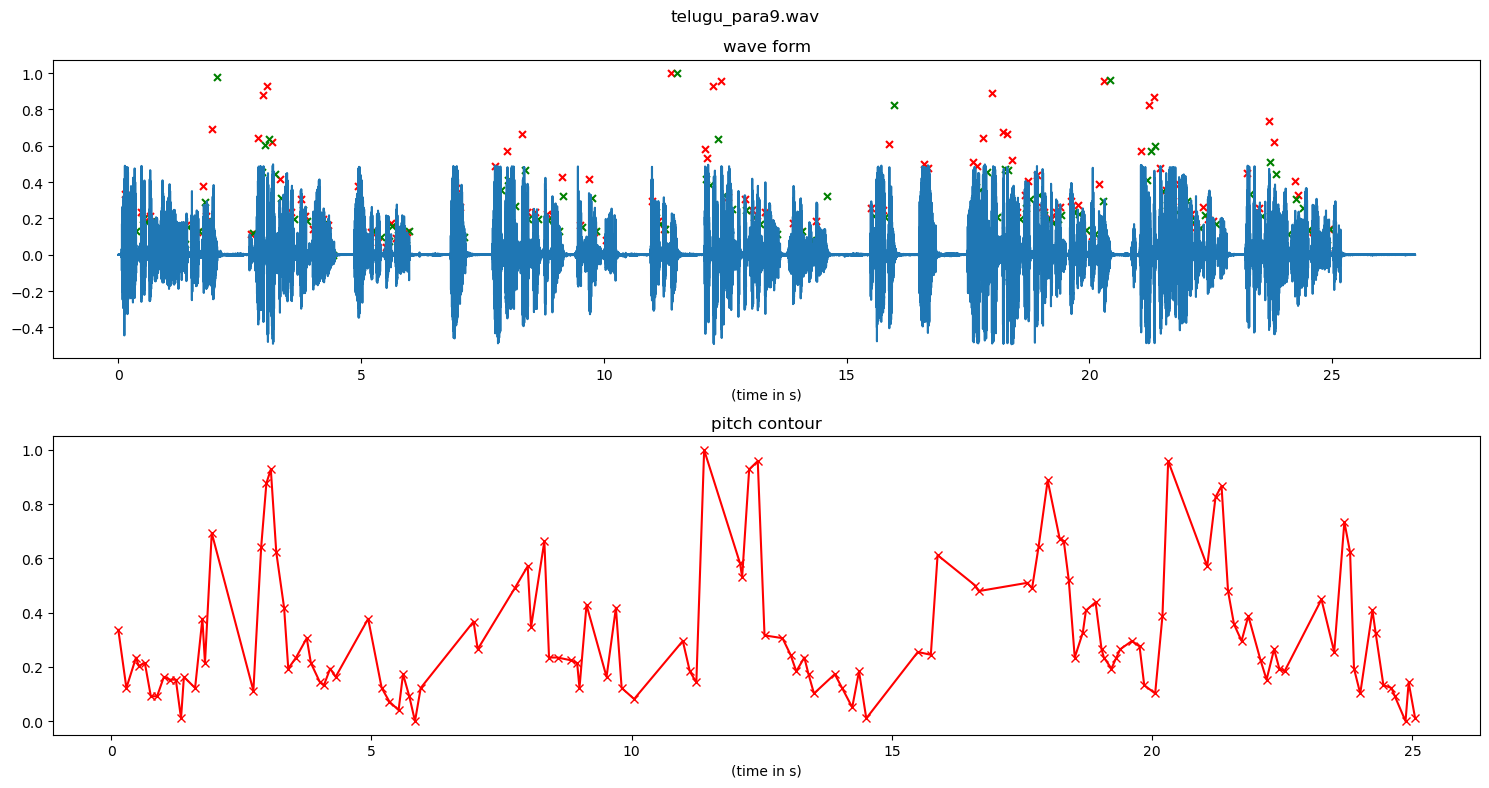

In [70]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(t,y)
ax[0].scatter(t[nucl_t1_sample],scaled_values,color='red', marker='x', s=25);
ax[0].scatter(t[nucl_t2_sample],scaled_values_end,color='green', marker='x', s=25);

# ax[0].scatter(t[coma_sample],np.ones(len(t_coma))*(-1),color='green', marker='1', s=100);
# ax[0].scatter(t[fullstop_sample],np.ones(len(t_fullstop))*(-1),color='black', marker='8', s=100);

# ax[0].legend(['Line', 'F0', 'Comma', 'Full Stop'], loc='upper right')
ax[0].set_title("wave form")
ax[0].set_xlabel("(time in s)")

ax[1].plot(t[nucl_t1_sample],scaled_values,color='red', marker='x');
# ax[1].scatter(t[coma_sample],np.zeros(len(t_coma))*(-1),color='green', marker='1', s=100);
# ax[1].scatter(t[fullstop_sample],np.zeros(len(t_fullstop))*(-1),color='black', marker='8', s=100);
# ax[1].legend(['F0', 'Comma', 'Full Stop'], loc='upper right');
ax[1].set_title("pitch contour")
ax[1].set_xlabel("(time in s)")

plt.suptitle(wav_file)
plt.tight_layout()

plt.savefig("./plots/" + name + "_pitchContour.png", dpi=300,bbox_inches='tight')
plt.show() 

In [71]:
def comparison(f0_value, pitch_top, pitch_bottom, f0_mean):
    L_value = abs(f0_value - pitch_bottom)
    M_value = abs(f0_value - f0_mean)
    H_value = abs(f0_value - pitch_top)

    if L_value <= M_value and L_value < H_value:
        return "L"
    elif M_value < L_value and M_value <= H_value:
        return "M"
    else:
        return "H"

In [72]:
#Getting L,H,M from data

new_lines = new_lines[1:] #remove header

labelled_rows = OrderedDict()

for row in new_lines:
    if len(row) > 1:
        #print("row_label:", row[row_label_index])
        #print("f0_start:", row[f0_start_index])
        #print("f0_end:", row[f0_end_index])

        label = row[row_label_index]
        f0_start = float(row[f0_start_index])
        f0_end = float(row[f0_end_index])
        #nucl_t1 = float(row[nucl_t1_index])
        #nucl_t2 = float(row[nucl_t2_index])


        if f0_start == f0_end:
            result_pitch = comparison(f0_start, pitch_top, pitch_bottom, f0_mean)
            #print(result_pitch)
            labelled_rows[label] =  result_pitch#, nucl_t1, nucl_t2]

        else:
            start_label = comparison(f0_start, pitch_top, pitch_bottom, f0_mean)
            end_label = comparison(f0_end, pitch_top, pitch_bottom, f0_mean)
            result_pitch = start_label + "-" + end_label
            #print(result_pitch)
            labelled_rows[label] =  result_pitch#, nucl_t1, nucl_t2]

print(labelled_rows)

OrderedDict([('0.136', 'M'), ('0.291', 'L'), ('0.476', 'M'), ('0.526', 'M'), ('0.646', 'M'), ('0.761', 'L'), ('0.881', 'L'), ('1.011', 'M'), ('1.126', 'M'), ('1.241', 'M'), ('1.341', 'L'), ('1.396', 'M'), ('1.611', 'L'), ('1.751', 'M'), ('1.801', 'M'), ('1.931', 'H-H'), ('2.731', 'L'), ('2.881', 'M'), ('2.981', 'H'), ('3.066', 'H'), ('3.171', 'M'), ('3.321', 'M'), ('3.401', 'M'), ('3.551', 'M'), ('3.756', 'M'), ('3.836', 'M'), ('4.011', 'L'), ('4.086', 'L'), ('4.206', 'M'), ('4.311', 'M-L'), ('4.936', 'M-L'), ('5.196', 'L'), ('5.346', 'L'), ('5.521', 'L'), ('5.606', 'M'), ('5.726', 'L'), ('5.836', 'L'), ('5.946', 'L'), ('6.961', 'M'), ('7.041', 'M-L'), ('7.751', 'M'), ('8.001', 'M'), ('8.066', 'M'), ('8.321', 'M'), ('8.411', 'M'), ('8.576', 'M'), ('8.831', 'M'), ('8.951', 'M'), ('8.996', 'L'), ('9.131', 'M'), ('9.516', 'M'), ('9.696', 'M'), ('9.806', 'L'), ('10.046', 'L'), ('10.981', 'M'), ('11.116', 'M'), ('11.241', 'L'), ('11.391', 'H-H'), ('12.081', 'M'), ('12.121', 'M'), ('12.256',

In [73]:
# def compare_labels(last_pitch, pitch_label):
#     if last_pitch == pitch_label:
#         return True
#     elif (last_pitch == 'L-L' and pitch_label == 'L') or (last_pitch == 'L' and pitch_label == 'L-L'):
#         return True
#     elif (last_pitch == 'M-M' and pitch_label == 'M') or (last_pitch == 'M' and pitch_label == 'M-M'):
#         return True
#     elif (last_pitch == 'H-H' and pitch_label == 'H') or (last_pitch == 'H' and pitch_label == 'H-H'):
#         return True
#     else:
#         return False

In [74]:
# #PREDICTION

# prediction = ""

# print("Time", "\t", "Label", "\t", "Trend", "\t", "Prediction")

# trend = 0 #-1 when trend is down, +1 when trend is up
# last_pitch = ''

# count = 0

# trend_count = 0

# last_trend = 0
# prev_prediction=""
# for i in labelled_rows:
#     #FULL-STOP PREDICTION
#     pitch_label = labelled_rows[i]
    
#     if count == 0:
#         last_pitch = pitch_label

#     if last_pitch == 'L' and (pitch_label == 'M' or pitch_label == 'H'):
#         trend = 1
#     elif last_pitch == 'M' and pitch_label == 'H':
#         trend = 1
#     elif last_pitch == 'M' and pitch_label == 'L':
#         trend = -1
#     elif last_pitch == 'H' and (pitch_label == 'M' or pitch_label == 'L'):
#         trend = -1
#     elif (last_pitch == 'L-M' or  last_pitch == 'M-H' or last_pitch == 'L-H') and pitch_label == 'L':
#         trend = -1
#     elif last_pitch  == 'M-H' and pitch_label == 'M':
#         trend = -1
#     elif (last_pitch == 'H-M' or last_pitch == 'M-L' or last_pitch == 'H-L') and pitch_label == 'H':
#         trend = 1
#     elif last_pitch == 'H-M' and pitch_label ==  'H':
#         trend = 1
#     elif pitch_label == 'L-M' or pitch_label == 'M-H' or pitch_label == 'L-H':
#         trend = 1
#     elif pitch_label == 'H-M' or pitch_label == 'M-L' or pitch_label == 'H-L':
#         trend = -1

#     if compare_labels(last_pitch, pitch_label): #If pitch label doesn't change for a while then the trend becomes 0
#         trend_count += 1

#         if trend_count >= 4:
#             trend = 0
#     else:
#         trend_count = 0

#     last_pitch = pitch_label

#     if last_trend == 1 and trend == -1:
#         prediction = "Comma/Phrase Boundary"
#     elif last_trend == -1 and trend == 1:
#         prediction = "Sentence Boundary"
#     else:
#         prediction = ""

#     last_trend = trend
# #     if(prediction!=""):
#     print(i, "\t", pitch_label, "\t", trend, "\t", prediction)
#     prev_prediction=prediction
#     count += 1

In [75]:
#Visualising the Data
y_array = []

for i in labelled_rows.keys():
    if labelled_rows[i] == 'H' or labelled_rows[i] == 'H-H':
        y_array.append(float(1))
    elif labelled_rows[i] == 'M' or labelled_rows[i] == 'M-M':
        y_array.append(float(0))
    elif labelled_rows[i] == 'L' or labelled_rows[i] == 'L-L':
        y_array.append(float(-1))
    elif labelled_rows[i] == 'L-M' or labelled_rows[i] == 'M-L':
        y_array.append(float(-0.5))
    elif labelled_rows[i] == 'M-H' or labelled_rows[i] == 'H-M':
        y_array.append(float(0.5))
    elif labelled_rows[i] == 'L-H' or labelled_rows[i] == 'H-L':
        y_array.append(float(0))
    else:
        y_array.append(float(0))

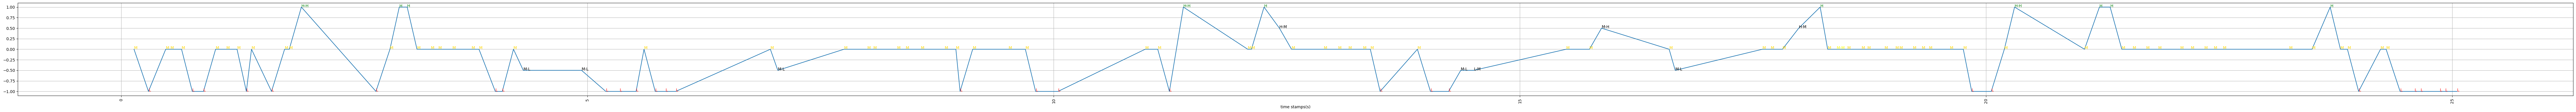

In [76]:
plt.figure(figsize=(90,4))
list_x =(list(labelled_rows.keys()))
x = [float(j) for j in list_x]
# plt.subplot(2,1,1)
plt.plot(x,y_array)
# plt.scatter(x, y_array, s=10)

color_dict = {'L': 'red', 'M': 'gold', 'H': 'green', 'L-L': 'red', 'M-M': 'yellow', 'H-H': 'green'}
count = 0
for row in x:
    plt.text(row, y_array[count], labelled_rows["{:.3f}".format(row)], color = color_dict.get(labelled_rows["{:.3f}".format(row)], 'black'))
    count += 1
plt.xlabel("time stamps(s)")
plt.xticks(rotation=90)
plt.grid();
# plt.subplot(2,1,2)
# dx = np.zeros(len(x[:-1]))
# dy = np.zeros(len(x[:-1]))

# for i in range(1,len(x)):
#     dx[i-1] = x[i]-x[i-1]
#     dy[i-1] = (y[i]-y[i-1])/dx[i-1]
# # Create a plot for the derivative
# plt.stem(x[:-1], dy, label="Derivative")
# plt.grid();

# plt.title("Derivative")

plt.tight_layout()
# plt.show()

plt.savefig("./plots/" + name + "prosogram.png", dpi=300,bbox_inches='tight')
plt.show()

In [77]:
data = {'Time Stamps (s)': x, 'Values': y_array, 'Labels': [labelled_rows["{:.3f}".format(row)] for row in x]}
df = pd.DataFrame(data)

In [78]:
df["punc"] = None
df

,Time Stamps (s),Values,Labels,punc
0,0.136,0.0,M,None
1,0.291,-1.0,L,None
2,0.476,0.0,M,None
3,0.526,0.0,M,None
4,0.646,0.0,M,None
...,...,...,...,...
122,24.596,-1.0,L,None
123,24.661,-1.0,L,None
124,24.866,-1.0,L,None
125,24.926,-1.0,L,None


In [48]:
# Function to find the index of the closest timestamp in list1 for a given timestamp
def find_closest_index(target, lst):
    return np.abs(np.array(lst) - target).argmin()

In [55]:
list1 = df['Time Stamps (s)'].tolist()
list2 = [10.4, 14.4, 18.45, 28.35, 37.9, 41.65, 48.95, 54, 61,66.4]
closest_indices = [find_closest_index(timestamp, list1) for timestamp in list2]

In [56]:
# Print the results
for i, timestamp in enumerate(list2):
    closest_index = closest_indices[i]
    closest_timestamp = list1[closest_index]
    df.at[closest_index, "punc"] = "."
df.info()
#     print(f"For timestamp {timestamp}, closest index in list1 is {closest_index} with timestamp {closest_timestamp}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Stamps (s)  299 non-null    float64
 1   Values           299 non-null    float64
 2   Labels           299 non-null    object 
 3   punc             10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X contains your features and y contains your labels (comma, full stop, none)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
predictions = rf_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importances")
plt.show()


In [ ]:
from pdpbox import pdp, get_dataset, info_plots
import matplotlib.pyplot as plt

# Assuming X contains your features and y contains your labels
# Make sure X is a DataFrame for compatibility with pdpbox

# Create a Random Forest model (you can use the one you trained earlier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Create a PDP for a specific feature
feature_to_plot = 'your_feature_name'
pdp_feature = pdp.pdp_isolate(model=rf_model, dataset=X, model_features=X.columns, feature=feature_to_plot)

# Plot the PDP
pdp.pdp_plot(pdp_feature, feature_to_plot)
plt.show()


In [ ]:
from pdpbox import pdp, get_dataset, info_plots

# Assuming X contains your features and y contains your labels
# Make sure X is a DataFrame for compatibility with pdpbox

# Create a Random Forest model (you can use the one you trained earlier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Choose two features for interaction plot
features_to_plot = ['feature1', 'feature2']

# Create an interaction plot
interact_plot = pdp.pdp_interact(model=rf_model, dataset=X, model_features=X.columns, features=features_to_plot)

# Plot the interaction plot
pdp.pdp_interact_plot(pdp_interact_out=interact_plot, feature_names=features_to_plot, plot_type='grid', plot_pdp=True)
plt.show()
cla